In [1]:
# encoding:utf-8
# 产生核对的数据
import datetime
import pymongo

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
myfont = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/msyh.ttf')
mpl.use('TkAgg')
#创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
#选择数据库
space_db = default_client['parity_space']
datetime1 = datetime.datetime(2017, 6, 1, 10,55, 0)

# projection是list形式
query_ = {
    'datetime':{'$gt': datetime1},
    'askPrice1':{'$lte': 0}
}

#选择collection和document
docs = space_db['Paritym17093000Strategy'].find(query_).sort([('datetime', pymongo.ASCENDING)])
result = pd.DataFrame(list(docs))
#result.head().to_csv('hedui.csv',header=True)
#print(result.head())
tick_db = default_client['VnTrader_Tick_Db']
docs = tick_db['m1709'].find(query_).sort([('datetime', pymongo.ASCENDING)])
result = pd.DataFrame(list(docs))
print result


f:\python\env\py27\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


                          _id  askPrice1  askPrice2  askPrice3  askPrice4  \
0    592f82a2f6daaa2a24856b86        0.0        0.0        0.0        0.0   
1    592f82adf6daaa2a24856c05        0.0        0.0        0.0        0.0   
2    592f8308f6daaa2a24856f5b        0.0        0.0        0.0        0.0   
3    592f8323f6daaa2a24856fae        0.0        0.0        0.0        0.0   
4    592f837df6daaa2a2485730f        0.0        0.0        0.0        0.0   
5    592f83d2f6daaa2a2485748e        0.0        0.0        0.0        0.0   
6    592f853df6daaa2a24858523        0.0        0.0        0.0        0.0   
7    592f853ef6daaa2a2485889c        0.0        0.0        0.0        0.0   
8    592f853ef6daaa2a248588d1        0.0        0.0        0.0        0.0   
9    592f855af6daaa2a24858e2f        0.0        0.0        0.0        0.0   
10   592f8599f6daaa2a24859079        0.0        0.0        0.0        0.0   
11   592f85c1f6daaa2a24859287        0.0        0.0        0.0        0.0   

In [6]:
# encoding:utf-8
# 作用：查看所有平价套利组合在历史某段时期内，套利空间的统计特征(8个字段)
import datetime
import pymongo

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#获取所有执行价
all_strike_price = range(2500, 3150, 50)
col_name_list = map(lambda x:  'Paritym1709' + str(x) +'Strategy', all_strike_price)


#选取特定时间段
datetime1 = datetime.datetime(2017, 5, 25, 9, 55, 0)
query_ = {
    'datetime':{'$gt': datetime1}
}

#最终结果保存在list(of dicts)中
history_info_df = pd.DataFrame(index=col_name_list, columns=['open_re_mean', 'close_re_mean', 'open_re_std', 'close_re_std'])

#创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
#选择数据库
space_db = default_client['parity_space']

#选择collection和document
for single_col_name in col_name_list:
    cursor_ = space_db[single_col_name].find(query_)
    print(cursor_.count())
    history_df = pd.DataFrame(list(cursor_))
    history_info_df.loc[single_col_name, 'open_re_mean'] = np.mean(history_df.open_re)
    history_info_df.loc[single_col_name, 'open_re_std'] = np.std(history_df.open_re)
    
    history_info_df.loc[single_col_name, 'close_re_mean'] = np.mean(history_df.close_re)
    history_info_df.loc[single_col_name, 'close_re_std'] = np.std(history_df.close_re)
    
print(history_info_df)
history_info_df.to_csv('history_info_df_5d.csv', encoding='utf-8', header=True)



16912
17063
17144
17488
17503
17576
17319
17453
17265
17228
17185
17079
17006
                        open_re_mean close_re_mean open_re_std close_re_std
Paritym17092500Strategy     -3.27203      0.632911    0.441977     0.615782
Paritym17092550Strategy     -3.06429       0.20805    0.478065     0.584259
Paritym17092600Strategy     -3.03021      0.205896    0.523111     0.579797
Paritym17092650Strategy     -3.91665     -0.490978    0.525253     0.611106
Paritym17092700Strategy     -3.72822     -0.483631    0.619352     0.664689
Paritym17092750Strategy     -3.44614     -0.399772    0.628051     0.569406
Paritym17092800Strategy     -3.53378     -0.443198    0.628445     0.609044
Paritym17092850Strategy     -3.43589      -0.21925    0.558154     0.529016
Paritym17092900Strategy     -3.03267      0.648593    0.500369      0.54589
Paritym17092950Strategy     -2.62638       1.10208    0.520152     0.497467
Paritym17093000Strategy     -3.13148      0.717254    0.689142     0.628029
Paritym170

1423


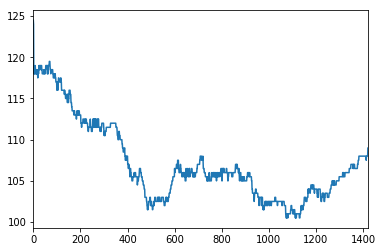

224


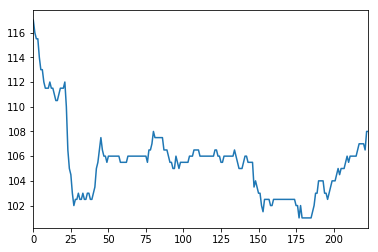

In [5]:
# encoding:utf-8
# 作用：查看期权（C、P）或期货合约（F）在某天，交易量曲线
import datetime
import pymongo

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
myfont = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/msyh.ttf')  
mpl.use('TkAgg')
#创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
#选择数据库
tick_db1 = default_client['VnTrader_Tick_Db']
tick_db2 = default_client['tick_1min']
datetime1 = datetime.datetime(2017, 6, 7, 9, 0, 0)
datetime2 = datetime.datetime(2017, 6, 7, 15, 0, 0)

# projection是list形式
query_ = {
    'datetime':{'$gt': datetime1, '$lt': datetime2},
    'askPrice1':{'$gt':0}
}

#选择collection和document
cursor1 = tick_db1['m1709-C-2600'].find(query_).sort([('datetime', pymongo.ASCENDING)])
print(cursor1.count())
history_df1 = pd.DataFrame(list(cursor1))
history_df1.askPrice1.plot()
plt.show()

cursor2 = tick_db2['m1709-C-2600'].find(query_).sort([('datetime', pymongo.ASCENDING)])
print(cursor2.count())
history_df2 = pd.DataFrame(list(cursor2))
history_df2.askPrice1.plot()
plt.show()

In [2]:
# encoding:utf-8
# 作用：查看所有平价套利组合在历史某段时期内，套利空间的统计特征(8个字段)
#然后获取一天中偏离度较大的交易机会
import datetime
import pymongo

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#获取所有执行价
all_strike_price = range(2500, 3150, 50)
col_name_list = map(lambda x:  'Paritym1709' + str(x) +'Strategy', all_strike_price)


#选取特定时间段
datetime1 = datetime.datetime(2017, 6, 1, 9, 0, 0)
query_ = {
    'datetime':{'$gt': datetime1}
}

#最终结果保存在list(of dicts)中
history_info_df = pd.DataFrame(index=col_name_list, columns=['open_re_mean', 'close_re_mean', 'open_re_std', 'close_re_std'])

#创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
#选择数据库
space_db = default_client['parity_space']

#选择collection和document,计算统计特征
for single_col_name in col_name_list:
    cursor_ = space_db[single_col_name].find(query_)
    print(cursor_.count())
    history_df = pd.DataFrame(list(cursor_))
    history_info_df.loc[single_col_name, 'open_re_mean'] = np.mean(history_df.open_re)
    history_info_df.loc[single_col_name, 'open_re_std'] = np.std(history_df.open_re)
    
    history_info_df.loc[single_col_name, 'close_re_mean'] = np.mean(history_df.close_re)
    history_info_df.loc[single_col_name, 'close_re_std'] = np.std(history_df.close_re)

column_open_re = ['datetime', 'askPrice1_p', 'askPrice1_c', 'askPrice1', 'open_re', 'strike_price']

column_close_re = ['datetime', 'askPrice1_p', 'askPrice1_c', 'askPrice1', 'close_re', 'strike_price']

for single_col_name in col_name_list:
    cursor_ = space_db[single_col_name].find(query_)
    print(single_col_name)
    history_df = pd.DataFrame(list(cursor_))
    #以re为例，open为例
    open_re_up = history_info_df.loc[single_col_name, 'open_re_mean'] + 4 * history_info_df.loc[single_col_name, 'open_re_std']
    close_re_down = history_info_df.loc[single_col_name, 'close_re_mean'] - 4 * history_info_df.loc[single_col_name, 'close_re_std']
    #筛选数据
    chance_open_re = history_df[history_df.open_re > open_re_up]
    chance_close_re = history_df[history_df.close_re < close_re_down]
    #设置索引为时间
    chance_open_re.index = chance_open_re.datetime
    chance_close_re.index = chance_close_re.datetime
    
    chance_open_re.loc[:, 'duplicated'] = chance_open_re.duplicated('datetime')
    chance_close_re.loc[:, 'duplicated'] = chance_close_re.duplicated('datetime')
    chance_open_re = chance_open_re.drop_duplicates('duplicated')
    chance_close_re = chance_close_re.drop_duplicates('duplicated')
    
    if not chance_open_re.empty:
        #chance_open_re.duplicated('datetime')
        #
        chance_open_re.loc[:, column_open_re].to_csv(single_col_name+'_chance_open_re.csv', encoding='utf-8', header=True)
    if not chance_close_re.empty:
        #chance_close_re.duplicated('datetime')
        #
        chance_close_re.loc[:, column_close_re].to_csv(single_col_name+'_chance_close_re.csv', encoding='utf-8', header=True)

21744
21915
22292
22523
22194
22053
21640
21307
21196
21115
21188
21110
20987
Paritym17092500Strategy
Paritym17092550Strategy
Paritym17092600Strategy
Paritym17092650Strategy
Paritym17092700Strategy
Paritym17092750Strategy
Paritym17092800Strategy
Paritym17092850Strategy
Paritym17092900Strategy
Paritym17092950Strategy
Paritym17093000Strategy
Paritym17093050Strategy
Paritym17093100Strategy


In [2]:
# encoding:utf-8
# 作用：取tick，导出为csv
import datetime
import pymongo

import numpy as np
import pandas as pd

all_symbols = ["m1708-C-2600", "m1708-C-2650", "m1708-C-2700", "m1708-C-2750", "m1708-C-2800", "m1708-C-2850", "m1708-C-2900", "m1707-C-2500", "m1707-P-2500", "m1708-C-2500", "m1708-P-2500", "m1712-C-2550", "m1712-P-2550", "m1707-C-3150", "m1707-P-3150", "m1707-C-3100", "m1707-P-3100", "m1711-C-3100", "m1711-P-3100", "m1709-C-3100", "m1709-P-3100", "m1801", "m1709-P-2600", "m1708-C-2950", "m1708-C-3000", "m1708-C-3050", "m1708-P-2600", "m1708-P-2650", "m1708-P-2700", "m1708-P-2750", "m1708-P-2800", "m1708-P-2850", "m1708-P-2900", "m1708-P-2950", "m1708-P-3000", "m1708-P-3050", "m1709-C-2550", "m1709-C-2600", "m1709-C-2650", "m1709-C-2700", "m1709-C-2750", "m1709-C-2800", "m1709-C-2850", "m1709-C-2900", "m1709-C-2950", "m1709-C-3000", "m1709-P-2550", "m1709-P-2650", "m1711-P-2900", "m1709-P-2700", "m1709-P-2750", "m1709-P-2800", "m1709-P-2850", "m1709-P-2900", "m1709-P-2950", "m1709-P-3000", "m1711-C-2600", "m1711-C-2650", "m1711-C-2700", "m1711-C-2750", "m1711-C-2800", "m1711-C-2850", "m1711-C-2900", "m1711-C-2950", "m1711-C-3000", "m1711-C-3050", "m1711-P-2600", "m1711-P-2650", "m1711-P-2700", "m1711-P-2750", "m1711-P-2800", "m1711-P-2850", "m1711-P-2950", "m1711-P-3000", "m1711-P-3050", "m1712-C-2650", "m1803-P-2800", "m1803-P-2850", "m1803-P-2900", "m1803-P-2950", "m1803-P-3000", "m1803-P-3050", "m1803-P-3100", "m1712-C-2700", "m1712-C-2750", "m1712-C-2800", "m1712-C-2850", "m1712-C-2900", "m1712-C-2950", "m1712-C-3000", "m1712-C-3050", "m1712-C-3100", "m1712-C-3150", "m1712-P-2650", "m1712-P-2700", "m1712-P-2750", "m1712-P-2800", "m1711", "m1712-P-2850", "m1712-P-2900", "m1712-P-2950", "m1712-P-3000", "m1712-P-3050", "m1712-P-3100", "m1712-P-3150", "m1801-C-2600", "m1801-C-2650", "m1801-C-2700", "m1801-C-2750", "m1801-C-2800", "m1801-C-2850", "m1801-C-2900", "m1801-C-2950", "m1801-C-3000", "m1801-C-3050", "m1801-P-2600", "m1801-P-2650", "m1801-P-2700", "m1801-P-2750", "m1801-P-2800", "m1801-P-2850", "m1801-P-2900", "m1801-P-2950", "m1805", "m1712", "m1801-P-3000", "m1801-P-3050", "m1803-C-2650", "m1803-C-2700", "m1803-C-2750", "m1803-C-2800", "m1803-C-2850", "m1803-C-2900", "m1803-C-2950", "m1803-C-3000", "m1803-C-3050", "m1803-C-3100", "m1803-P-2650", "m1803-P-2700", "m1803-P-2750", "m1707-C-2600", "m1707-C-2650", "m1707-C-2700", "m1707-C-2750", "m1707-C-2800", "m1707-C-2850", "m1707-C-2900", "m1707-C-2950", "m1707-C-3000", "m1707-C-3050", "m1707-P-2600", "m1707-P-2650", "m1707-P-2700", "m1707-P-2750", "m1707-P-2800", "m1707-P-2850", "m1707-P-2900", "m1707-P-2950", "m1707-P-3000", "m1707-P-3050", "m1803", "m1708-C-3100", "m1708-P-3100", "m1709-C-3050", "m1709-P-3050", "m1801-C-3100", "m1801-P-3100", "m1707-C-2550", "m1707-P-2550", "m1712-C-2600", "m1712-P-2600", "m1803-C-2600", "m1803-P-2600", "m1709", "m1708-C-2550", "m1708-P-2550", "m1709-C-2500", "m1709-P-2500", "m1711-C-2550", "m1711-P-2550", "m1801-C-2550", "m1801-P-2550", "m1803-C-2550", "m1803-P-2550", "m1707", "m1708"]
all_symbols.sort()

#创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
#选择数据库
tick_db = default_client['VnTrader_Tick_Db']

#查询条件
start_datetime = datetime.datetime(2017, 5, 16, 9, 0, 0)
end_datetime = datetime.datetime.now()
time_query = {
    'datetime': {'$gt':start_datetime, '$lt':end_datetime}
}
for single_symbol in all_symbols:
    cursor = tick_db[single_symbol].find(time_query)
    cursor_list = list(cursor)
    if not cursor_list:
        continue
    df = pd.DataFrame(cursor_list)
    print(single_symbol)
    df.to_csv(single_symbol+'.csv', header=True, encoding='utf-8')

m1707
m1707-C-2500
m1707-C-2550
m1707-C-2600
m1707-C-2650
m1707-C-2700
m1707-C-2750
m1707-C-2800
m1707-C-2850
m1707-C-2900
m1707-C-2950
m1707-C-3000
m1707-C-3050
m1707-C-3100
m1707-C-3150
m1707-P-2500
m1707-P-2550
m1707-P-2600
m1707-P-2650
m1707-P-2700
m1707-P-2750
m1707-P-2800
m1707-P-2850
m1707-P-2900
m1707-P-2950
m1707-P-3000
m1707-P-3050
m1707-P-3100
m1707-P-3150
m1708
m1708-C-2500
m1708-C-2550
m1708-C-2600
m1708-C-2650
m1708-C-2700
m1708-C-2750
m1708-C-2800
m1708-C-2850
m1708-C-2900
m1708-C-2950
m1708-C-3000
m1708-C-3050
m1708-C-3100
m1708-P-2500
m1708-P-2550
m1708-P-2600
m1708-P-2650
m1708-P-2700
m1708-P-2750
m1708-P-2800
m1708-P-2850
m1708-P-2900
m1708-P-2950
m1708-P-3000
m1708-P-3050
m1708-P-3100
m1709
m1709-C-2500
m1709-C-2550
m1709-C-2600
m1709-C-2650
m1709-C-2700
m1709-C-2750
m1709-C-2800
m1709-C-2850
m1709-C-2900
m1709-C-2950
m1709-C-3000
m1709-C-3050
m1709-C-3100
m1709-P-2500
m1709-P-2550
m1709-P-2600
m1709-P-2650
m1709-P-2700
m1709-P-2750
m1709-P-2800
m1709-P-2850
m1709-P

In [26]:
x = y = z = 256
x = 256
print(x is y) #最大缓存支持256
x = y = z = [1,1]
x.append(3)
print(x is y)

True
True
